In [3]:
import pandas as pd

# Load the JSON file
df = pd.read_json(r'C:\Users\adebu\anaconda_projects\headline-insights\data\News_Category_Dataset_v3.json', lines=True)

# Preview the data
df.head()


link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22

In [4]:
# Check columns and row count
print(df.columns)
print(f"Total rows: {len(df)}")


Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')
Total rows: 209527


In [5]:
# Add a column for headline length
df['headline_length'] = df['headline'].apply(len)


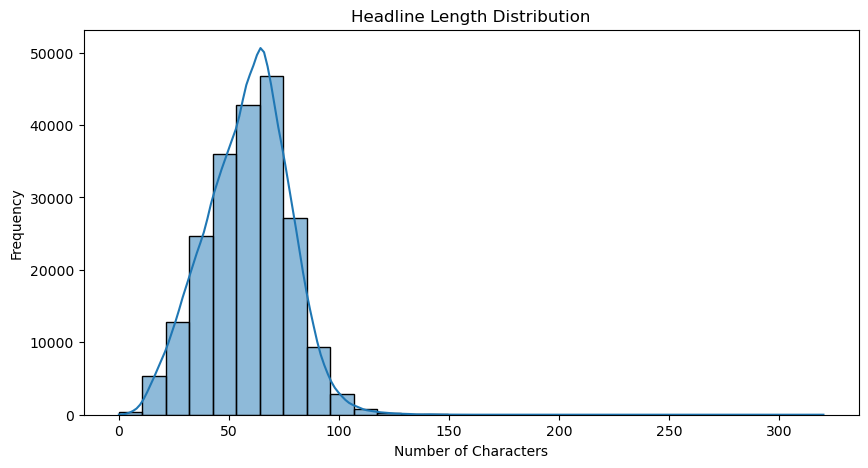

In [6]:
# Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Headline Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [7]:
# Count how many times each category appears
df['category'].value_counts().head(10)


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64

In [8]:
# Add word count column
df['word_count'] = df['headline'].apply(lambda x: len(x.split()))


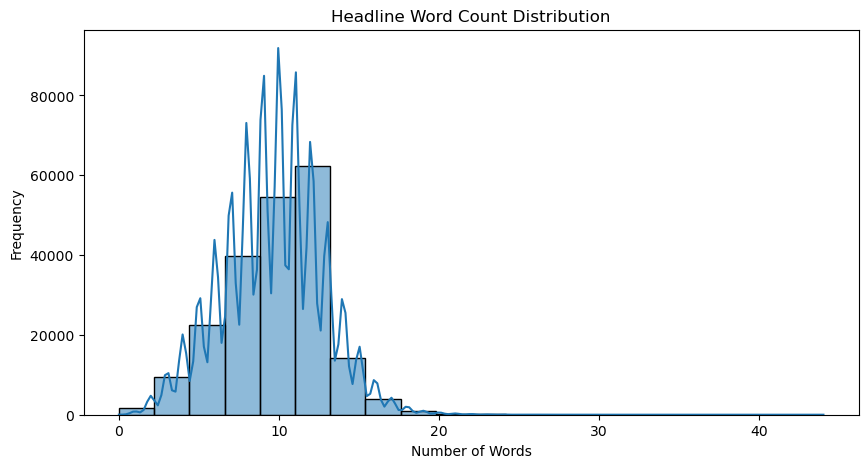

In [10]:
# Visualize Word Count Distributio
plt.figure(figsize=(10,5))
sns.histplot(df['word_count'], bins=20, kde=True)
plt.title("Headline Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [11]:
import string
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adebu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Split into words
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return words


In [15]:
# Count the most common words
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)
top_words


[('trump', 10555),
 ('photos', 10308),
 ('new', 8984),
 ('video', 5862),
 ('us', 4935),
 ('donald', 4831),
 ('day', 4509),
 ('says', 4164),
 ('best', 3755),
 ('5', 3453)]

In [14]:
all_words = df['headline'].apply(clean_and_tokenize).explode()


In [16]:
from collections import Counter

word_counts = Counter(all_words)
top_words = word_counts.most_common(10)
top_words


[('trump', 10555),
 ('photos', 10308),
 ('new', 8984),
 ('video', 5862),
 ('us', 4935),
 ('donald', 4831),
 ('day', 4509),
 ('says', 4164),
 ('best', 3755),
 ('5', 3453)]

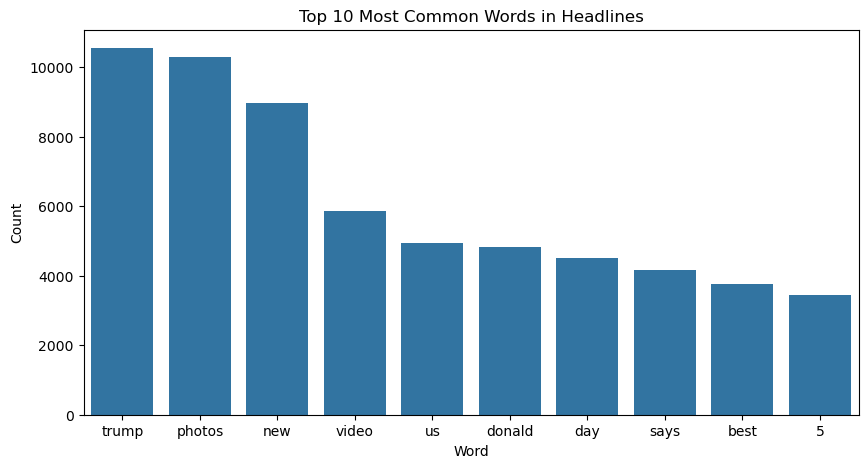

In [17]:
# Convert to DataFrame for plotting
top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot it
plt.figure(figsize=(10,5))
sns.barplot(data=top_words_df, x='word', y='count')
plt.title("Top 10 Most Common Words in Headlines")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()


In [18]:
from textblob import TextBlob


In [19]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


In [20]:
df['sentiment'] = df['headline'].apply(get_sentiment)


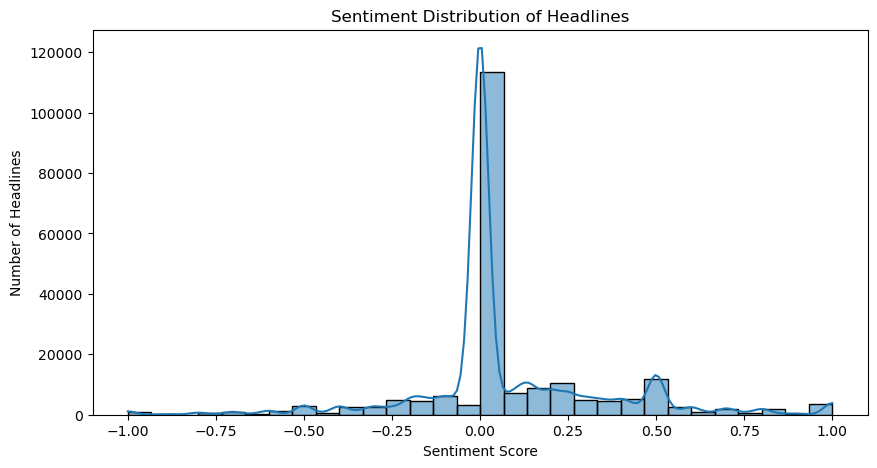

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution of Headlines")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Headlines")
plt.show()


In [23]:
# Categorize the Sentiment
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(label_sentiment)
df['sentiment_label'].value_counts()


sentiment_label
Neutral     126829
Positive     58739
Negative     23959
Name: count, dtype: int64

In [24]:
# Filter to Top Categories (Optional but helpful)
top_categories = df['category'].value_counts().head(6).index.tolist()
df_top = df[df['category'].isin(top_categories)]


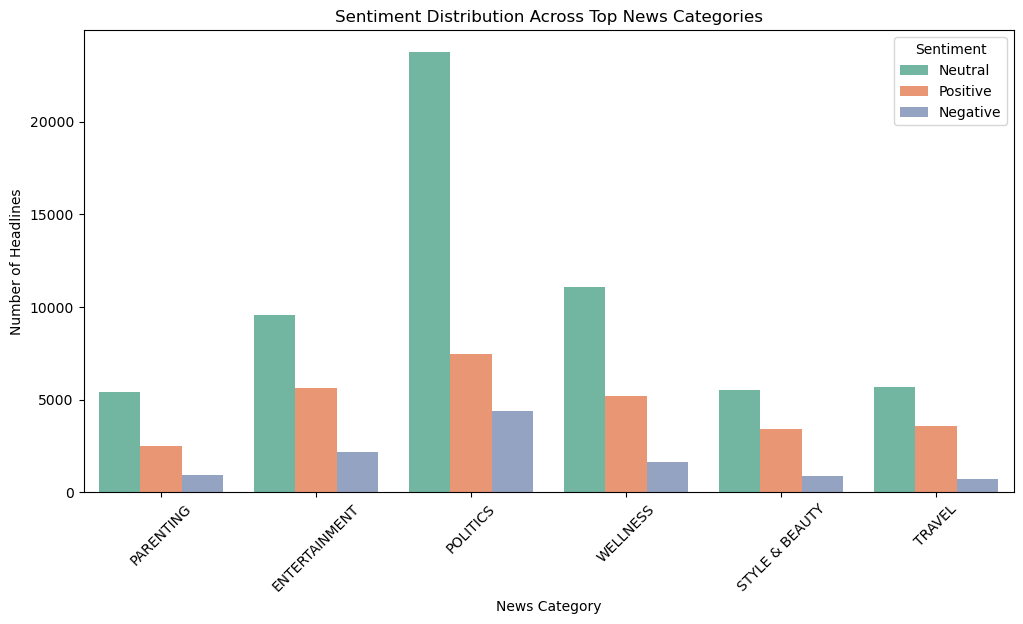

In [25]:
# Plot Sentiment Breakdown by Category
plt.figure(figsize=(12,6))
sns.countplot(data=df_top, x='category', hue='sentiment_label', palette='Set2')
plt.title("Sentiment Distribution Across Top News Categories")
plt.xlabel("News Category")
plt.ylabel("Number of Headlines")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()


In [26]:
#  Calculate Average Sentiment Score per Category
avg_sentiment = df.groupby('category')['sentiment'].mean().sort_values(ascending=False)
avg_sentiment.head(10)


category
TASTE             0.170875
TRAVEL            0.156158
HOME & LIVING     0.155825
FOOD & DRINK      0.152090
STYLE             0.149656
QUEER VOICES      0.135129
GOOD NEWS         0.128940
FIFTY             0.117021
STYLE & BEAUTY    0.115400
WEDDINGS          0.115263
Name: sentiment, dtype: float64

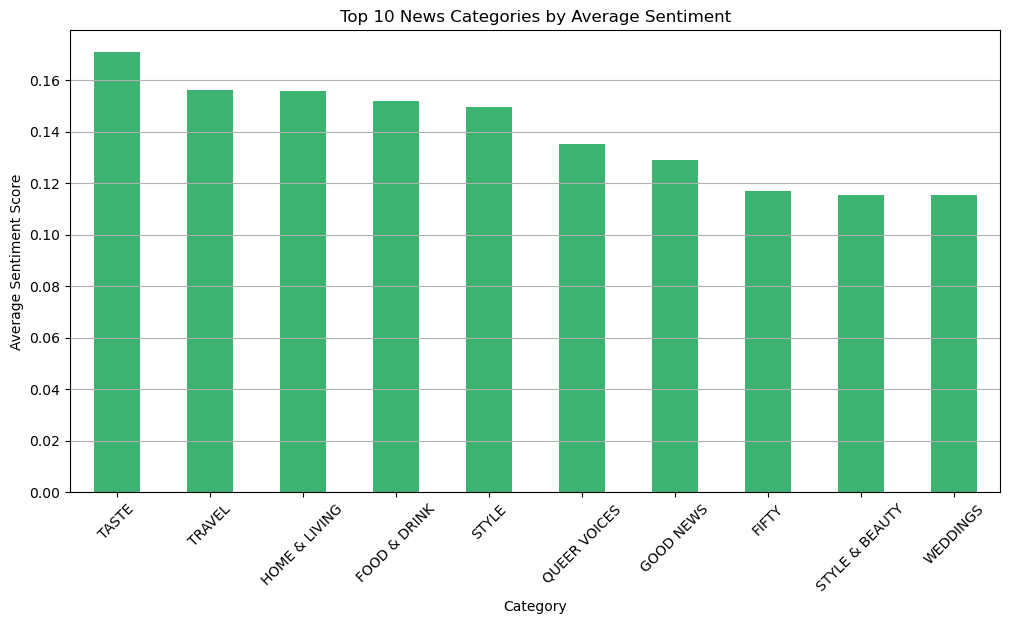

In [27]:
# Visualization
plt.figure(figsize=(12,6))
avg_sentiment.head(10).plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 News Categories by Average Sentiment")
plt.xlabel("Category")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [28]:
# split the dataset into groups: Positive, Negative, and Neutral.

positive_words = df[df['sentiment_label'] == 'Positive']['headline'].apply(clean_and_tokenize).explode()
negative_words = df[df['sentiment_label'] == 'Negative']['headline'].apply(clean_and_tokenize).explode()
neutral_words = df[df['sentiment_label'] == 'Neutral']['headline'].apply(clean_and_tokenize).explode()




In [29]:
from collections import Counter

print("Positive:", Counter(positive_words).most_common(5))
print("Negative:", Counter(negative_words).most_common(5))
print("Neutral:", Counter(neutral_words).most_common(5))


Positive: [('new', 6599), ('photos', 4147), ('best', 3593), ('first', 2371), ('love', 2285)]
Negative: [('trump', 1436), ('black', 1168), ('photos', 931), ('dead', 814), ('game', 790)]
Neutral: [('trump', 6887), ('photos', 5230), ('video', 3239), ('us', 3133), ('donald', 3095)]


In [33]:
# Bar Plots for Positive/Negative Words
def clean_and_tokenize(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words


In [31]:
# Apply to Each Sentiment Group
from collections import Counter

positive_words = df[df['sentiment_label'] == 'Positive']['headline'].apply(clean_and_tokenize).explode()
negative_words = df[df['sentiment_label'] == 'Negative']['headline'].apply(clean_and_tokenize).explode()

top_pos = Counter(positive_words).most_common(10)
top_neg = Counter(negative_words).most_common(10)

df_pos = pd.DataFrame(top_pos, columns=['word', 'count'])
df_neg = pd.DataFrame(top_neg, columns=['word', 'count'])


C:\Users\adebu\AppData\Local\Temp\ipykernel_6492\3596533570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pos, x='word', y='count', palette='Greens_d')


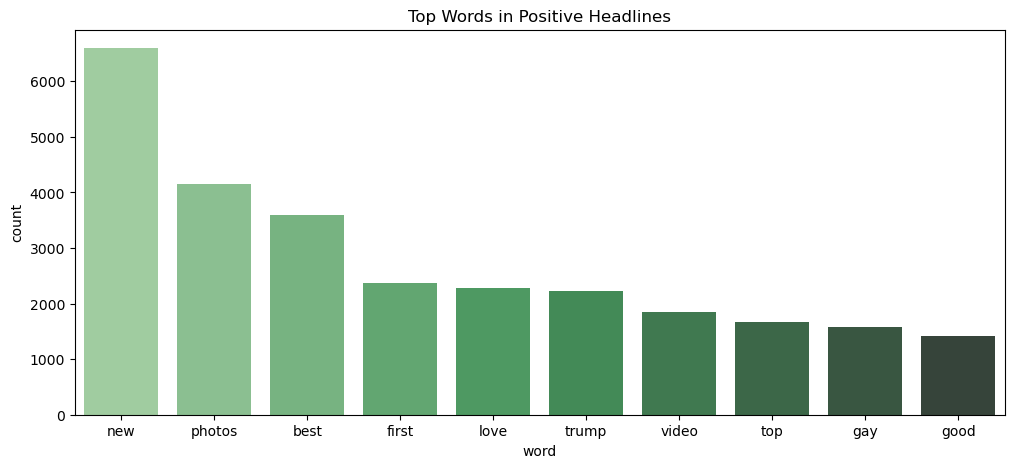

C:\Users\adebu\AppData\Local\Temp\ipykernel_6492\3596533570.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_neg, x='word', y='count', palette='Reds_d')


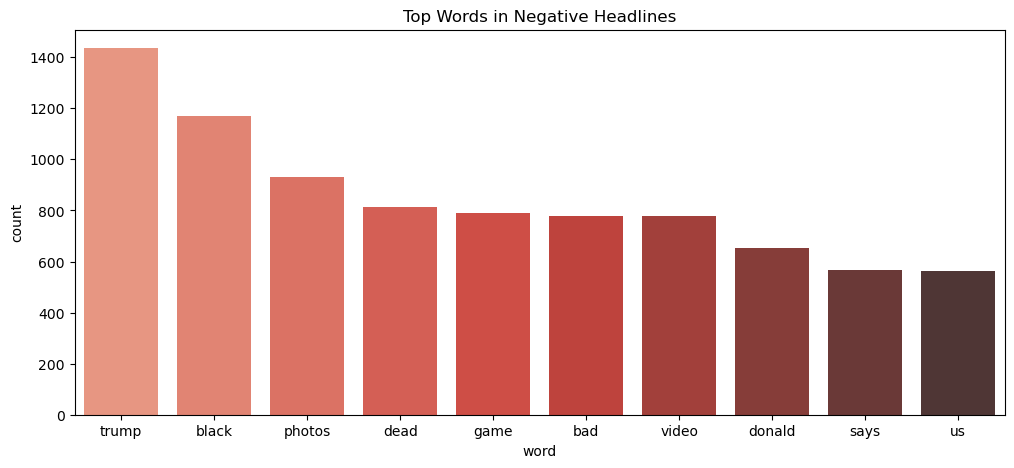

In [32]:
# Display
plt.figure(figsize=(12,5))
sns.barplot(data=df_pos, x='word', y='count', palette='Greens_d')
plt.title("Top Words in Positive Headlines")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=df_neg, x='word', y='count', palette='Reds_d')
plt.title("Top Words in Negative Headlines")
plt.show()


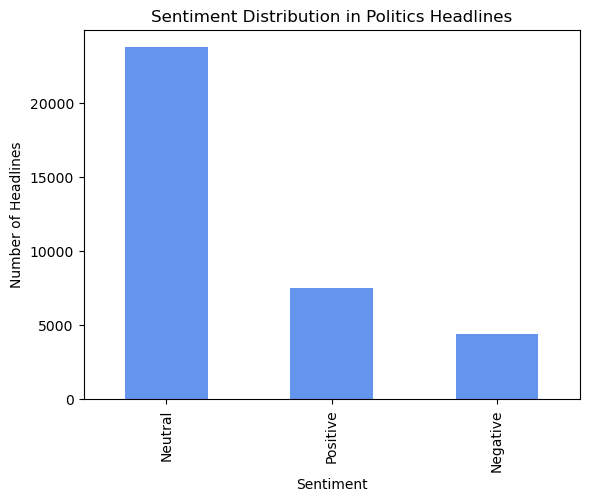

In [34]:
# Drilling Deeper into “POLITICS”
df_politics = df[df['category'] == 'POLITICS']

# Explore its Sentiment Distribution
df_politics['sentiment_label'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.title("Sentiment Distribution in Politics Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")
plt.show()


In [35]:
# Top Word in Politics
politics_words = df_politics['headline'].apply(clean_and_tokenize).explode()
pd.DataFrame(Counter(politics_words).most_common(10), columns=['word', 'count'])


word  count
0    trump   7438
1   donald   3112
2   trumps   1929
3      gop   1788
4  clinton   1528
5     says   1475
6      new   1374
7    obama   1342
8    house   1315
9  hillary   1273

In [36]:
# Saving results
df.to_csv('headline_sentiment_analysis.csv', index=False)
avg_sentiment.to_csv('avg_sentiment_per_category.csv')
